![dsl_logo.png](https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/dsl_logo.png)

# Analyzing Web Archives

Welcome to the Digital Scholarship Lab Level Analyzing Web Archives workshop. The following notebook provides an investigation into the [Meme Generator dataset](https://www.loc.gov/item/2018655320/)


## How this notebook works

This webpage is a Google Colab notebook and is comprised of different *cells*. Some are code cells that run Python snippets. To works through these cells simply click on the triangle _run_ button in each cell. Click in the cell below to see the play button, then click on it.

![How to](how-to.gif)

In [ ]:
!pip install langdetect
!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image,display,IFrame
from ipywidgets import widgets,interact,interact_manual
from langdetect import detect
import matplotlib.pyplot as plt

global rando

%matplotlib inline
print("\nLibraries loaded, and ready to run!")


Libraries loaded, and ready to run!


# Loading our data set

The information from this archive is saved in a _CSV_ file. Or put in otherwords, something like a spreadsheet. In the next cell we will load this file into something call a dataframe and we'll look at the first 5 entries by looking at the **head**.

In [ ]:
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data["Meme ID"] = meme_data["Meme ID"].astype(str)

meme_data.head(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
0,10509464,http://webarchive.loc.gov/all/0/http://cdn.mem...,Spiderman Approves,http://memegenerator.net/instance/10509464,91eee1453f2b66b4b0d662476bf630d8,87868,seems legit,Spiderman Approves,seems,legit
1,12285257,http://webarchive.loc.gov/all/0/http://cdn.mem...,Alright Then Business Kid,http://memegenerator.net/instance/12285257,96a3aa60c0f3a5ffb027e8977f23b2cc,110242,Fret not I stayed at a Holiday Inn Express las...,Alright Then Business Kid,Fret not,I stayed at a Holiday Inn Express last night
2,20612245,http://webarchive.loc.gov/all/0/https://cdn.me...,Archer,http://memegenerator.net/instance/20612245,1b84704851704a2dc366768a2210d659,125963,"hello airplanes? yeah, this is blimps. Yeah, y...",Archer,"hello airplanes? yeah, this is blimps.","Yeah, you win."
3,20614628,http://webarchive.loc.gov/all/0/http://cdn.mem...,Futurama Fry,http://memegenerator.net/instance/20614628,448f5d4a15f5c90ce4d64c75013c8e9a,161623,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,BUt Scared monster under the bed will eat me
4,24194267,http://webarchive.loc.gov/all/0/https://cdn.me...,One Does Not Simply,http://memegenerator.net/instance/24194267,37feb180a0e7660e360ed94380b39f60,92866,one does not simply put toothpaste back in th...,One Does Not Simply,one does not simply,put toothpaste back in the tube


# Some General Data Exploration




---



### How much data?

We can count the **length** of our data frame to see how many entries we have using thing len() function.


In [ ]:

print("We have this many memes to look at: ",len(meme_data))


We have this many memes to look at:  57687


### Random Entry

To get a better sense of what is in our dataset let's look at a random entry by using **sample** with a value of 1. Click the below button a few times to get a few different options.

In [ ]:
rando = meme_data.sample(1)
display(Image(url=rando['Archived URL'].values[0], format='jpg'))
print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
rando

View on Memegenerator: 	 http://memegenerator.net/instance/10251426
View on Archive: 			 http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/10251426.jpg


,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
1570,10251426,http://webarchive.loc.gov/all/0/https://cdn.me...,Feels Bad Man Frog,http://memegenerator.net/instance/10251426,25b2870d7eccbbd265c1057993d1f360,48258,joint rauchen wissen das er nicht wie ein scho...,Feels Bad Man Frog,joint rauchen,wissen das er nicht wie ein schoen gestopfter ...


**Q1** Have a look at the data that is associated with a random record. In the chat box suggest some things you might want to explore with this data? Share your reponse in the chat box.

# Category of memes?

As you might know, memes come in many different flavours. Let's see if we can find out how many types there are? We'll do this by **grouping** our _Base Meme Name_ column and **counting** how many entries are in each.

In [ ]:
meme_data.groupby(["Base Meme Name"]).count()

,Meme ID,Archived URL,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
Base Meme Name,,,,,,,,,
-,70,70,70,70,70,70,70,70,70
10guy,1,1,1,1,1,1,1,1,1
12 oz mouse,9,9,9,9,9,9,9,9,9
158,66,66,66,66,66,66,66,66,66
1889 [10] guy,52,52,52,52,52,52,52,52,52
...,...,...,...,...,...,...,...,...,...
ТИПИЧНАЯ DIVA,45,45,45,45,45,45,45,45,45
ТИПИЧНЫЙ JONGHYUN,1,1,1,1,1,1,1,1,1
ТИПИЧНЫЙ ONEW,1,1,1,1,1,1,1,1,1


**Q2** Based on the above summary how many different type so memes we have? Share your response in the chat box.

Yikes! That looks like a lot. Let's just keep the top **25** entries. We'll do this by **sorting**.

In [ ]:

meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)[0:25]

,Meme ID,Archived URL,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
Base Meme Name,,,,,,,,,
Y U No,766,766,766,766,766,766,766,766,766
Futurama Fry,663,663,663,663,663,663,663,663,663
Insanity Wolf,612,612,612,612,612,612,612,612,612
Philosoraptor,531,531,531,531,531,531,531,531,531
The Most Interesting Man In The World,511,511,511,511,511,511,511,511,511
Success Kid,510,510,510,510,510,510,510,510,510
Foul Bachelor Frog,469,469,469,469,469,469,469,469,468
Socially Awkward Penguin,446,446,446,446,446,446,446,446,446
Advice Yoda Gives,420,420,420,420,420,420,420,420,420


In [ ]:
#Random Entry Form
def show_random(choice):
  rando = meme_data[meme_data["Base Meme Name"] == str(choice)].sample(1)
  print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
  print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
  display(Image(url=rando['Archived URL'].values[0], format='jpg'))
  display(rando)


title_textbox = widgets.Text(
    value='Me Gusta',
    description='Category',
)
print("Enter a meme category from the list above to see a random entry in that category")
print("Click 'Show' to display\n")
show_random_control = interact_manual.options(manual_name="Show")
show_random_control(show_random,choice=title_textbox);

Enter a meme category from the list above to see a random entry in that category
Click 'Show' to display



interactive(children=(Text(value='Me Gusta', description='Category'), Button(description='Show', style=ButtonS…

Let's know look at how the meme is displayed as a table

What's the **average** number of memes in each type?



In [ ]:
meme_type_average = meme_data.groupby(["Base Meme Name"])["Meme ID"].count().mean()
print("Average number of entries per meme category: ",meme_type_average)

Average number of entries per meme category:  34.940642035130224


The average might be a little misleading. Let's also check what the median number is for each base meme. The code chunk below is incomplete. Can you resolve the error?

In [ ]:
meme_type_median = meme_data.groupby(["Base Meme Name"])["Meme ID"].count().median()
print("The median number of entires per base meme is: ",meme_type_median)

The median number of entires per base meme is:  34.940642035130224


As you can see, the difference between the mean and the median is significant. This is because there's a skewed distribution in our dataset. Do you have any guesses as to why this might be the case? Share your thoughts in the chat!

Let's visualize this skewed distribution by drawing a **histogram**.

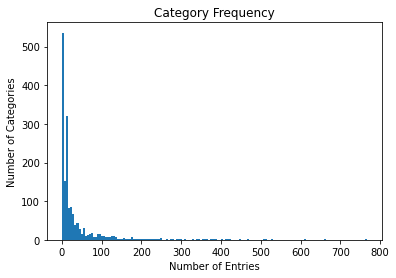

In [ ]:
bins = 150

plt.hist(meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)["Meme ID"],bins)

plt.title("Category Frequency")
plt.xlabel("Number of Entries")
plt.ylabel("Number of Categories")
plt.show()

**Q3** Can you describe this graph? What is the biggest value that it is showing?

## Language info

As we've seen in our examples there are many different languages represented in our dataset. Let's see if we can **enrich** our dataset by automatically detecting what language it is and adding that as a new column. We'll use the [langdetect](https://pypi.org/project/langdetect/) library to do this. We can use the text in the _Alternate Text_ column.

In [ ]:
#Let's look at our random item again
rando

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
1570,10251426,http://webarchive.loc.gov/all/0/https://cdn.me...,Feels Bad Man Frog,http://memegenerator.net/instance/10251426,25b2870d7eccbbd265c1057993d1f360,48258,joint rauchen wissen das er nicht wie ein scho...,Feels Bad Man Frog,joint rauchen,wissen das er nicht wie ein schoen gestopfter ...


In [ ]:
# Let's the language of the random entry from earlier
# We'll get a two letter languge code that represents one of the languages in the list of ISO 639-1 codes (https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes). 
print(detect(str(rando["Alternate Text"])))

de


It would take to long to calculate all these values now for all of the entries in the dataset. So the next cell will just add a new column to our dataset of pre-calculated values. (It took 8 minutes for language detection code to run on the original dataset)

Have a look at the new column _Language_ that was added.

In [ ]:
#reload original dataset
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data["Meme ID"] = meme_data["Meme ID"].astype(str)

#open CSV of language info and create a dataframe
lang_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/language_data.csv")

#language data from to meme_data dataframe
meme_data = meme_data.join(lang_data)
meme_data.sample(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text,Language
22013,15381042,http://webarchive.loc.gov/all/0/http://cdn.mem...,we got a badass over here,http://memegenerator.net/instance/15381042,720df8c00d623436a09874c6ec9dab02,39967,Atheist pretending to be a christian on the in...,we got a badass over here,Atheist pretending to be a christian on the in...,whoa we got a badass here,en
34287,22353123,http://webarchive.loc.gov/all/0/http://cdn.mem...,Skeptical 3rd World Kid,http://memegenerator.net/instance/22353123,b8216471c89910c4ea1f1892206fca71,68584,no sera que tienes otro por hay que estas enga...,Skeptical 3rd World Kid,no sera que tienes otro por hay que estas enga...,a perra,es
54739,33201584,http://webarchive.loc.gov/all/0/http://cdn.mem...,friends,http://memegenerator.net/instance/33201584,f4f70f386af62868ec3ae1266eb60eef,52243,"roleplayers СОПЛЕМЕННИЦА, СОКЛАНОВКА СОПЛИКЛ...",friends-roleplayers,"СОПЛЕМЕННИЦА, СОКЛАНОВКА",СОПЛИКЛАНОВКА,ru
43935,26983954,http://webarchive.loc.gov/all/0/http://cdn.mem...,Feel Like A Sir,http://memegenerator.net/instance/26983954,0c5ce49ccd00c577f31fda9f5af3f78c,31756,Know how to vote in the next election like a sir,Feel Like A Sir,Know how to vote in the next election,like a sir,en
24415,16629850,http://webarchive.loc.gov/all/0/http://cdn.mem...,Scumbag Chick Fil A Cow,http://memegenerator.net/instance/16629850,043ae72ebd6ac95b1584f87a8a347484,51778,I TOOK THAT BITCH TO CHICK FIL A BITCHES LOVE ...,Scumbag Chick Fil A Cow,I TOOK THAT BITCH TO CHICK FIL-A,BITCHES LOVE CHICK FIL-A,en



## Summary of Language Information?

Run the next cell to generate a pie graph of the language count in the meme.

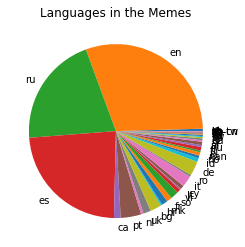

In [ ]:
language_count = dict()

# Go through each row of the data and see what two letter language code
# is in the iso_language_code metadata field

for row in meme_data.itertuples(index=False):
  language_entry = row[-1]
  #Create a lookup 'dictionary' of codes
  if language_entry in language_count:
    language_count[language_entry] += 1
  else:
    language_count[language_entry] = 1
    

plt.pie(list(language_count.values()),labels=list(language_count.keys()))
plt.title("Languages in the Memes")
plt.show()

That's a lot of languages!

## Meme Scores!

Memegenerator has voting capability. By clicking the up or down arrow users can increase / descrease this score. Let's see this for our random meme. Run the next cell to generate the preview

In [ ]:
preview_url = str(rando['Meme Page URL'].values[0])
preview_url = preview_url.replace("http:","https:")

IFrame(preview_url,width=1000, height=700)

To enrich our dataset even more we found the scores of all of the memes in dataset. We did this by **downloading** all 60000 meme webpages and screen scrapping to find the score that was presented on the page. This took about **4 Hours** so we won't recreate this here. We will however open a CSV file of these scores and add them to our dataset, just like we did with the language information. Run the next cell to do this and preview a few random scores.

In [ ]:
#Lets open the file and have a peak.
meme_scores = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/meme_scores.csv",dtype={'Meme ID': object})
meme_scores["Meme ID"] = meme_scores["Meme ID"].astype(str)
meme_scores.sample(5)

,Meme ID,Score
27904,33432170,0
52925,24717480,4
32544,11782716,27
38831,22911458,16
16,32224879,175


Let's add this data to our original dataset by matching on the **Meme ID** column. Then let's look at a couple of random entries of our newly enriched completed dataset. For memes that we couldn't get a score for, we use a placeholder valued called _NaN_. (We missed some scores because the memes were deleted from the website) Run the next cell to create our final version of the dataset with all of enriched data and display a few random entries. Notice how we add a column called _Score_.


In [ ]:
#Original Dataset
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data["Meme ID"] = meme_data["Meme ID"].astype(str)

#Language information added
lang_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/language_data.csv")
meme_data = meme_data.join(lang_data)

#Meme Score Added
meme_scores = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/meme_scores.csv",dtype={'Meme ID': object})
meme_scores["Meme ID"] = meme_scores["Meme ID"].astype(str)
meme_data = pd.merge(meme_data,meme_scores,on="Meme ID", how = "outer")
meme_data.dropna(thresh=8,inplace=True)

#set our random item to be from our new dataframe
rando = meme_data.sample(1)
meme_data.sample(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text,Language,Score
10074,11138023,http://webarchive.loc.gov/all/0/https://cdn.me...,Sir Courage Wolf Esquire,http://memegenerator.net/instance/11138023,aaa416832358c16f0c04dc76e3db805c,64951.0,"Теперь обо мне, терпел потери в борьбе, и меня...",Sir Courage Wolf Esquire,"Теперь обо мне, терпел потери в борьбе, и меня...","я дважды обжигался тут, эта толпа сочла глупым...",ru,1.0
28031,18811916,http://webarchive.loc.gov/all/0/https://cdn.me...,Chill Out Lemur,http://memegenerator.net/instance/18811916,f65688ad98a9ed4f8595a9a4ce77a945,38774.0,todo bien parse ya estoy bien,Chill Out Lemur,-,todo bien parse ya estoy bien,es,0.0
49022,29837005,http://webarchive.loc.gov/all/0/http://cdn.mem...,Disaster Girl,http://memegenerator.net/instance/29837005,f20bb24ff6933dddfadba6c48d4998b0,55980.0,fire isn't dangerous i am ~,Disaster Girl,fire isn't dangerous,i am ~,da,67.0
39010,24226356,http://webarchive.loc.gov/all/0/https://cdn.me...,i know kung fu,http://memegenerator.net/instance/24226356,d42389fada6304e727ff7a5e28ed72b8,50182.0,tuve un sueño erotico con la kaira !,i know kung fu,tuve un sueño erotico,con la kaira !,es,0.0
7492,10757603,http://webarchive.loc.gov/all/0/https://cdn.me...,Racist Dog,http://memegenerator.net/instance/10757603,cb6fbd817a3a1143433c7d4bf5598a46,41818.0,slavery gets shit done,Racist Dog,slavery,gets shit done,en,60.0


## The Final Analysis: Scores


Let's take a look at some aspects of our data now that we have enriched it with all the extra pieces:

- Language 
- Scores

In [ ]:
print("Average score of memes: ",meme_data["Score"].mean())

Average score of memes:  10.576686894303052


In [ ]:
print("Average score by languages, top 10 only: ")
pd.DataFrame(meme_data.groupby("Language").mean()["Score"].sort_values(ascending=False)[0:10])

Average score by languages, top 10 only: 


,Score
Language,
ar,44.666667
en,29.960710
da,19.219780
no,18.206107
af,16.943114
fi,12.451128
sv,9.605769
de,7.551300
vi,6.245478


In [ ]:
print("Average score by base memes, top 25 only: ")
#print(meme_data.groupby("Base Meme Name").mean()["Score"].sort_values(ascending=False)[0:25])
pd.DataFrame(meme_data.groupby("Base Meme Name").mean()["Score"].sort_values(ascending=False)[0:25])

Average score by base memes, top 25 only: 


,Score
Base Meme Name,
Scumbag Analytic Philosopher,159.400000
Douchebag Roommate,134.437500
Fallout 3,117.142857
Jonnen Neuvo,111.000000
PTSD Karate Kyle,88.272727
Stereotypical Corps Guy,85.714286
Idiot Nerd Girl,85.066667
Condescending Wonka,84.750000
Privilege Denying Feminist,82.882353


## Highest Scoring Meme in the dataset!

In [ ]:
display(Image(url=meme_data[meme_data['Score'] == meme_data['Score'].max()]['Archived URL'].values[0], format='jpg'))
meme_data[meme_data['Score'] == meme_data['Score'].max()]

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text,Language,Score
32193,21335866,http://webarchive.loc.gov/all/0/http://cdn.mem...,Trollface,http://memegenerator.net/instance/21335866,4979f0c5be91788f290afa4a4791be4c,45715.0,guys press ctrl+like and see what happens,Trollface,guys,press ctrl+like and see what happens,en,2970.0



# Congratulations

You've now had a tour of the Memegenerator dataset and found some interesting results.